https://stepik.org/lesson/1370103/step/7

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split


np.random.seed(0)
# исходные параметры распределений классов
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.5
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

# SVM с линейным ядром + обучение
clf = svm.SVC(kernel='linear').fit(x_train, y_train)

# Веса
w1 = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
w2 = [clf.intercept_[1], clf.coef_[1][0], clf.coef_[1][1]]
w3 = [clf.intercept_[2], clf.coef_[2][0], clf.coef_[2][1]]
w = [w1, w2, w3] # для графика

# Предсказание на тесте
predict = clf.predict(x_test)

# Качество на тесте
Q = sum(y_test != predict)

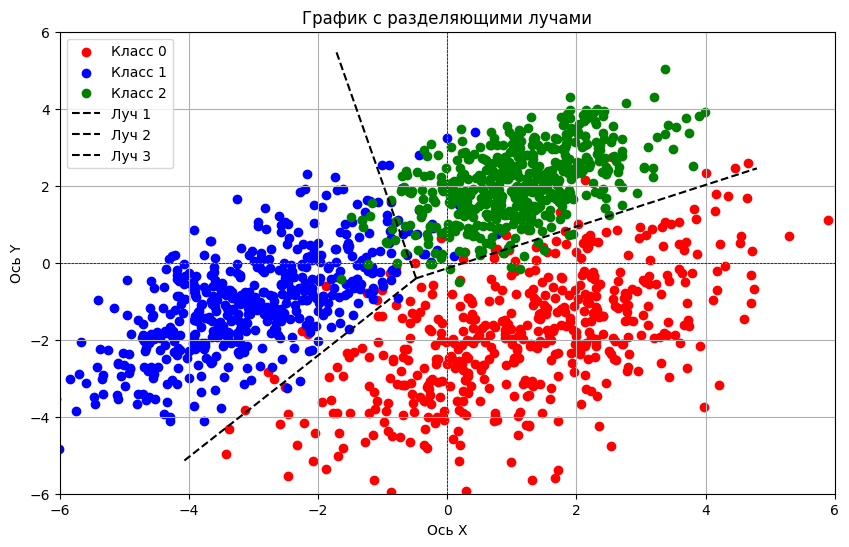

'ЛИНИИ ВМЕСТО ЛУЧЕЙ'

In [ ]:
# График
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Отображение данных классов
plt.scatter(x1[0], x1[1], color='red', label='Класс 0')
plt.scatter(x2[0], x2[1], color='blue', label='Класс 1')
plt.scatter(x3[0], x3[1], color='green', label='Класс 2')

# Определение центра (можно использовать среднее значение всех точек)
# center_x = np.mean(data_x[:, 0])
# center_y = np.mean(data_x[:, 1])

# А можно и точно вычислить как точку пересечения прямых
from sympy import Symbol, solve

x = Symbol('x')
# y = -(w[0] + w[1] * x) / w[2]
center_x = solve((w1[0] + w1[1] * x) / w1[2] - (w2[0] + w2[1] * x) / w2[2])[0]
center_y = -(w1[0] + w1[1] * center_x) / w1[2]

# Построение лучей для каждого класса
for i in range(len(w)):
    # Угол для луча
    angle = np.arctan(-w[i][1] / w[i][2])  # Угол наклона линии разделения
    length = 6  # Длина луча

    # Конечные координаты луча
    dir = ((i == 1)  * 2) - 1
    end_x = center_x + length * np.cos(angle) * dir
    end_y = center_y + length * np.sin(angle) * dir

    # Рисуем луч от центра до конца луча
    plt.plot([center_x, end_x], [center_y, end_y], 'k--', label=f'Луч {i+1}')

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title('График с разделяющими лучами')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.show()

'''ЛИНИИ ВМЕСТО ЛУЧЕЙ'''
# # Построение разделяющих линий для каждого класса
# xlim = plt.xlim()
# xx = np.linspace(xlim[0], xlim[1])
# for i in range(len(w)):
#     yy = -(w[i][0] + w[i][1] * xx) / w[i][2]
#     plt.plot(xx, yy, 'k--', label=f'Разделяющая линия {i+1}', color='red')

# plt.xlim(xlim)
# plt.ylim(ylim)
# plt.title('График с разделяющими линиями')
# plt.xlabel('Ось X')
# plt.ylabel('Ось Y')
# plt.legend()
# plt.grid(True)
# plt.show()